# Ford Gobike system Data
## by Kriti Singh

## Preliminary Wrangling

> Ford GoBike System Dateset is a dateset that contains trip data from lyft's bike service for public use. Variables including, trip duration, start time and end time with date, start station and end station names, start and end coordinates, customer type and bike share.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import glob
import os
%matplotlib inline

In [3]:
csv_read_path = os.getcwd()
data_write_path = os.path.join(os.getcwd(), 'final_data')
final_data_path = os.path.join(data_write_path, 'ford_bike_data.csv')
print(final_data_path)

files = glob.glob(os.path.join(csv_read_path, "*.csv"))
df = pd.concat((pd.read_csv(f) for f in files), ignore_index = True)
df.to_csv(final_data_path, index = False)



C:\Users\Kriti\Desktop\python\communicate-data-project-template\Project Template\final_data\ford_bike_data.csv


> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [4]:
df1 = pd.read_csv(final_data_path)
df1.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,-122.399749,321,Customer,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,No


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 14 columns):
duration_sec               int64
start_time                 object
end_time                   object
start_station_id           float64
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  object
bike_share_for_all_trip    object
dtypes: float64(6), int64(2), object(6)
memory usage: 199.1+ MB


In [5]:
df1.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,1.863721e+06,1.851950e+06,1.863721e+06,1.863721e+06,1.851950e+06,1.863721e+06,1.863721e+06,1.863721e+06
mean,8.573026e+02,1.196744e+02,3.776678e+01,-1.223492e+02,1.181730e+02,3.776690e+01,-1.223487e+02,2.296851e+03
std,2.370379e+03,1.003976e+02,1.057689e-01,1.654634e-01,1.004403e+02,1.056483e-01,1.650597e-01,1.287733e+03
min,6.100000e+01,3.000000e+00,3.726331e+01,-1.224737e+02,3.000000e+00,3.726331e+01,-1.224737e+02,1.100000e+01
25%,3.500000e+02,3.300000e+01,3.777106e+01,-1.224114e+02,3.000000e+01,3.777106e+01,-1.224094e+02,1.225000e+03
50%,5.560000e+02,8.900000e+01,3.778107e+01,-1.223974e+02,8.800000e+01,3.778127e+01,-1.223971e+02,2.338000e+03
75%,8.720000e+02,1.860000e+02,3.779625e+01,-1.222865e+02,1.830000e+02,3.779728e+01,-1.222894e+02,3.333000e+03
max,8.636600e+04,3.810000e+02,4.551000e+01,-7.357000e+01,3.810000e+02,4.551000e+01,-7.357000e+01,6.234000e+03


In [6]:
df1.duplicated().sum()

0

In [7]:
df1.shape

(1863721, 14)

### What is the structure of your dataset?

> The dataset contains 1863721 rows and 14 columns

### What is/are the main feature(s) of interest in your dataset?

> user type and bike share for all trip


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Duration sec, start time, bike id, user type, bike share for all trip


QUALITY ISSUES:
1)Start time and End time should be converted to timestamp
2)User type, gender and bike_share_for_all_trip change to category
3)bike_id, start_station_id, end_station_id should be converted to string object
4)Get month, day, hour, weekday columns 
 

# Cleaning Data

In [8]:
df2 = df1.copy()

In [9]:
#Converting start time and end time to timestamp
df2.start_time = pd.to_datetime(df2.start_time)
df2.end_time = pd.to_datetime(df2.end_time)

In [10]:
#Converting user_type and bike_share_for_all_trip to category 
df2.user_type = df2.user_type.astype("category")
df2.bike_share_for_all_trip = df2.bike_share_for_all_trip.astype("category")

In [11]:
#Converting start_station_id, end_station_id and bike_id to string objects
df2.start_station_id = df2.bike_id.astype(str)
df2.end_station_id = df2.bike_id.astype(str)
df2.bike_id = df2.bike_id.astype(str)

In [12]:
#Extracting month from start_time
df2['start_month']=df2['start_time'].dt.strftime('%B')

In [13]:
#Extracting weekday from start time
df2['start_time_weekday']=df2['start_time'].dt.strftime('%a')

In [14]:
#Extracting day from start time
df2['start_time_day']=df2['start_time'].dt.day.astype(int)

In [15]:
#Extracting hour from start time
df2['start_time_hour']=df2['start_time'].dt.hour

In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 18 columns):
duration_sec               int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id           object
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             object
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    object
user_type                  category
bike_share_for_all_trip    category
start_month                object
start_time_weekday         object
start_time_day             int32
start_time_hour            int64
dtypes: category(2), datetime64[ns](2), float64(4), int32(1), int64(2), object(7)
memory usage: 224.0+ MB


In [17]:
df2.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,start_month,start_time_weekday,start_time_day,start_time_hour
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,2765,Mission Dolores Park,37.761420,-122.426435,2765,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,No,January,Wed,31,22
1,85422,2018-01-31 16:13:34.351,2018-02-01 15:57:17.310,2815,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,No,January,Wed,31,16
2,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,3039,Jackson St at 5th St,37.348759,-121.894798,3039,5th St at Virginia St,37.325998,-121.877120,3039,Customer,No,January,Wed,31,14
3,61076,2018-01-31 14:53:23.562,2018-02-01 07:51:20.500,321,Market St at Franklin St,37.773793,-122.421239,321,4th St at Harrison St,37.780955,-122.399749,321,Customer,No,January,Wed,31,14
4,39966,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,617,Laguna St at Hayes St,37.776435,-122.426244,617,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,No,January,Wed,31,19


In [18]:
write_path_cleaned = os.path.join(data_write_path, 'ford_bike_data_cleaned.csv')

df2.to_csv(write_path_cleaned, index = False)

In [19]:
df2.start_time_weekday.unique()

array(['Wed', 'Tue', 'Mon', 'Sun', 'Sat', 'Fri', 'Thu'], dtype=object)

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

# Duration Histogram

([<matplotlib.axis.XTick at 0x199026ccb38>,
 [Text(10, 0, '10'),
  Text(30, 0, '30'),
  Text(100, 0, '100'),
  Text(300, 0, '300'),
  Text(1000, 0, '1000'),
  Text(3000, 0, '3000'),
  Text(10000, 0, '10000'),
  Text(30000, 0, '30000')])

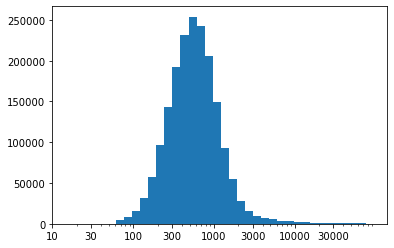

In [20]:
#Plotting duration_sec histogram
bins = 10** np.arange(1.785, 4.936+0.1, 0.1)
ticks = [10, 30, 100, 300, 1000, 3000, 10000, 30000]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data = df2, x = "duration_sec", bins = bins)
plt.xscale("log")
plt.xticks(ticks, labels)

# Monthly bike rides

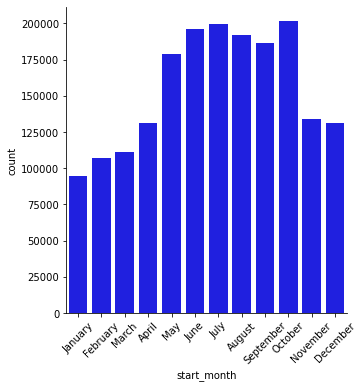

In [21]:
#Plotting Bar Graph for start time month
chart = sb.catplot(data=df2, x='start_month', kind='count', color='blue')
chart.set_xticklabels(rotation=45)

# Bike rides by Weekdays

(-1.1046654891323278,
 1.1067396006687447,
 -1.1093593252416865,
 1.102045764559386)

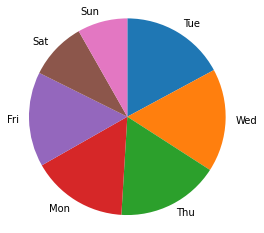

In [22]:
#Plotting Pie Graph for Start Time Day
sorted_counts = df2['start_time_weekday'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False);
plt.axis('square')

# Hourly Bike Rides

Text(0.5, 1.0, 'Histogram for Start time Hour')

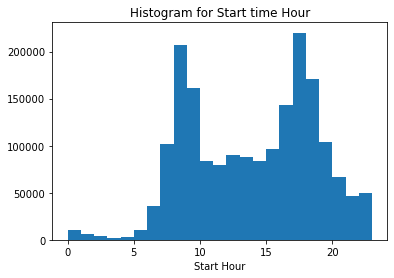

In [23]:
#Plotting histogram for start time hour
bins = np.arange(0, df2["start_time_hour"].max()+1, 1)
plt.hist(df2["start_time_hour"], bins = bins)
plt.xlabel("Start Hour")
plt.title("Histogram for Start time Hour")

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

The above visualization contains duration of bike rides, monthly bike rides, weekly bike rides and houly bike rides.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Here I have segmented the start time into 4 domains i.e, start month, start weekday, start day amd start hour and the graps of all of them have been plotted so as to demonstate the trends.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Yeah, I had to sort all the quality issues such as converting start time and end time to timestamp. Similarly converting user type and bike share for all trip to category and sinifying the weekday, hour, month and Day column

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

# Start time hour vs weekday

<AxesSubplot:xlabel='start_time_weekday', ylabel='start_time_hour'>

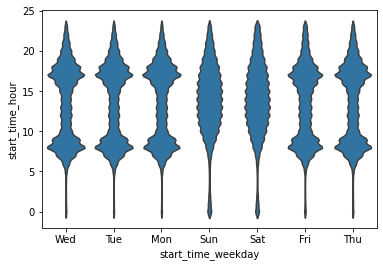

In [24]:
base_color = sb.color_palette()[0]
sb.violinplot(data = df2, x = 'start_time_weekday', y = 'start_time_hour', color = base_color,
              inner = None)


# Start time hour for bike share status

<AxesSubplot:xlabel='bike_share_for_all_trip', ylabel='start_time_hour'>

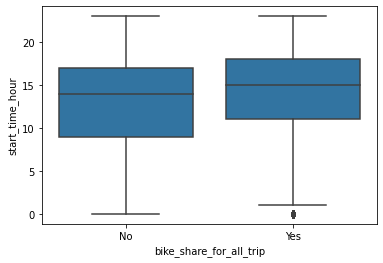

In [25]:
base_color = sb.color_palette()[0]
sb.boxplot(data = df2, y = 'start_time_hour', x = 'bike_share_for_all_trip', color = base_color)

# Customer and subscriber percentage

In [26]:
customer = df2.query('user_type == "Customer"')["bike_id"].count()
subscriber = df2.query('user_type == "Subscriber"')["bike_id"].count()
customer_percentage = customer/df2["bike_id"].count()
subscriber_percentage = subscriber/df2["bike_id"].count()


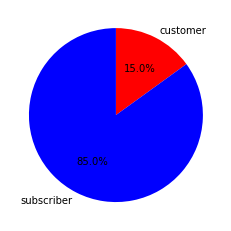

In [27]:

labels = ["customer", "subscriber"]
sizes = [customer_percentage, subscriber_percentage]
colors = ["red", "blue"]

plt.pie(sizes, labels = labels, colors = colors, startangle = 90,
        autopct='%1.1f%%', counterclock = False);

# Bike ride duration for each weekday

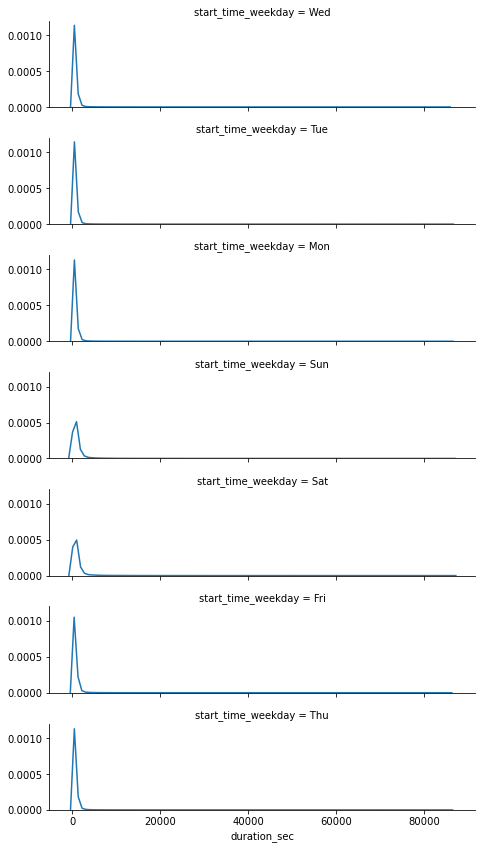

In [28]:
g = sb.FacetGrid(df2, row="start_time_weekday",
                  height=1.7, aspect=4,)
g.map(sb.kdeplot, "duration_sec")

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

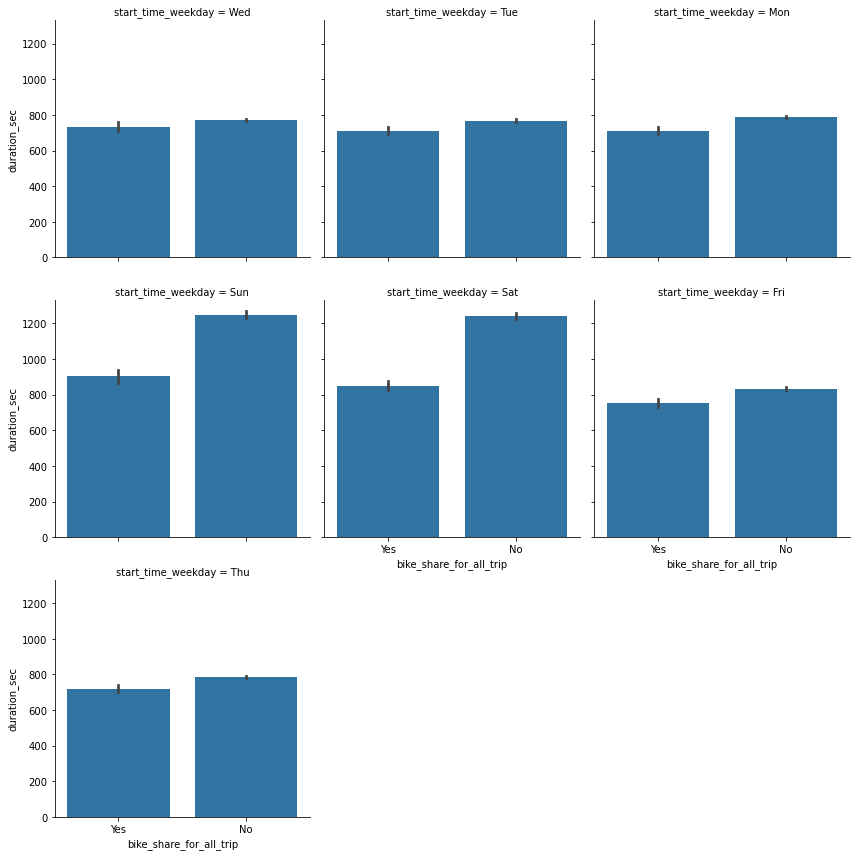

In [29]:
g = sb.FacetGrid(df2, col="start_time_weekday", col_wrap =3, height=4, aspect=1)
g.map(sb.barplot, "bike_share_for_all_trip", "duration_sec", order=["Yes", "No"])

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The relations observed in this dataset was that the bike rides on week days are greater than that on weekends and the subscriber consists of almost 85% of the bike rides taking place.

### Were there any interesting or surprising interactions between features?

> The one feature that caught my attention was that generally on saturdays and sundays people prefer going alone on rides i.e, they do not share bikes while on the weekdays the ratio is almost same.

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!